# SUPERSTORE

In [15]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt

## Importing Dataset

In [3]:
# Import Dataset

# Load the Excel file
superstore_dataset = "Superstore_RawData_Original.xlsx"
xls = pd.ExcelFile(superstore_dataset)

# Display sheet names
print(xls.sheet_names)

# Read the first sheet into a DataFrame
Superstore = pd.read_excel(xls, sheet_name=xls.sheet_names[0])

# Display the first few rows
print(Superstore.head())


['Shortcut Keys Practice', 'Hypothesis & Data Dictionary', 'Orders', 'Customers']
  order_info_id order_id_number           order_date  ship_date     ship_mode  \
0       AE-2019         1231682  2019-12-18 00:00:00 2019-12-23  Second Class   
1       AE-2019         1263608  2019-12-26 00:00:00 2019-12-31  Second Class   
2       AE-2019          303016  2019-12-18 00:00:00 2019-12-23  Second Class   
3       AE-2019          304471  2019-12-27 00:00:00 2019-12-31  Second Class   
4       AE-2019         3123605  2019-11-30 00:00:00 2019-12-05  Second Class   

         product_id         category sub_category  \
0  TEC-MOT-10001535       Technology       Phones   
1  OFF-AVE-10004827  Office Supplies      Binders   
2  TEC-MOT-10001535       Technology       Phones   
3  TEC-MOT-10001535       Technology       Phones   
4  OFF-ROG-10001340  Office Supplies      Storage   

                    product_name  unit_cost  sales  profit  quantity  \
0         Motorola Headset, VoIP      23

## Data Cleaning

In [4]:
# Data Cleaning

# Load the Orders and Customers sheets
orders_df = pd.read_excel(xls, sheet_name="Orders")
customers_df = pd.read_excel(xls, sheet_name="Customers")

# Display the first few rows of each dataset
orders_df.head(), customers_df.head()


(  order_info_id  order_id_number order_date  ship_date     ship_mode  \
 0       AE-2019          1231682 2019-12-18 2019-12-23  Second Class   
 1       AE-2019          1263608 2019-12-26 2019-12-31  Second Class   
 2       AE-2019           303016 2019-12-18 2019-12-23  Second Class   
 3       AE-2019           304471 2019-12-27 2019-12-31  Second Class   
 4       AE-2019          3123605 2019-11-30 2019-12-05  Second Class   
 
          product_id         category sub_category  \
 0  TEC-MOT-10001535       Technology       Phones   
 1  OFF-AVE-10004827  Office Supplies      Binders   
 2  TEC-MOT-10001535       Technology       Phones   
 3  TEC-MOT-10001535       Technology       Phones   
 4  OFF-ROG-10001340  Office Supplies      Storage   
 
                     product_name  unit_cost  sales  profit  quantity  \
 0         Motorola Headset, VoIP      23.95  95.80    0.33         4   
 1  Avery Binder Covers, Recycled      11.43   3.43    0.33         1   
 2         Moto

In [5]:
# Findings from Data Cleaning:

# Check for missing values in both datasets
missing_orders = orders_df.isnull().sum()
missing_customers = customers_df.isnull().sum()

# Check for duplicates in orders and customers
duplicate_orders = orders_df.duplicated().sum()
duplicate_customers = customers_df.duplicated().sum()

# Check data types for consistency
orders_dtypes = orders_df.dtypes
customers_dtypes = customers_df.dtypes

missing_orders, missing_customers, duplicate_orders, duplicate_customers, orders_dtypes, customers_dtypes


(order_info_id        0
 order_id_number      0
 order_date           0
 ship_date            0
 ship_mode            0
 product_id           0
 category             0
 sub_category         0
 product_name         0
 unit_cost            0
 sales                0
 profit               0
 quantity             0
 discount             0
 profit_margin      103
 postal_code          0
 city_state           0
 customer_id          0
 dtype: int64,
 customer_id      0
 customer_name    0
 segment          0
 dtype: int64,
 0,
 0,
 order_info_id              object
 order_id_number             int64
 order_date         datetime64[ns]
 ship_date          datetime64[ns]
 ship_mode                  object
 product_id                 object
 category                   object
 sub_category               object
 product_name               object
 unit_cost                 float64
 sales                     float64
 profit                    float64
 quantity                    int64
 discount      

In [6]:
# Fill missing values in profit_margin:

# Profit margin is calculated as profit divided by sales (when sales is not zero)
orders_df['profit_margin'] = orders_df.apply(
    lambda row: row['profit'] / row['sales'] if pd.isnull(row['profit_margin']) and row['sales'] != 0 else row['profit_margin'],
    axis=1
)

# Verify if all missing values are handled
orders_df['profit_margin'].isnull().sum()


0

## Exploratory Data Analysis (EDA)

In [7]:
# Merge Orders and Customers datasets - For EDA Purposes
merged_df = orders_df.merge(customers_df, on="customer_id", how="left")

# Display the first few rows of the merged dataset
merged_df.head()


,order_info_id,order_id_number,order_date,ship_date,ship_mode,product_id,category,sub_category,product_name,unit_cost,sales,profit,quantity,discount,profit_margin,postal_code,city_state,customer_id,customer_name,segment
0,AE-2019,1231682,2019-12-18,2019-12-23,Second Class,TEC-MOT-10001535,Technology,Phones,"Motorola Headset, VoIP",23.95,95.80,0.33,4,0.40,0.003445,47374,"Richmond, Indiana",GH-4665,Greg Hansen,Consumer
1,AE-2019,1263608,2019-12-26,2019-12-31,Second Class,OFF-AVE-10004827,Office Supplies,Binders,"Avery Binder Covers, Recycled",11.43,3.43,0.33,1,0.40,0.096210,78745,"Austin, Texas",GH-4665,Greg Hansen,Consumer
2,AE-2019,303016,2019-12-18,2019-12-23,Second Class,TEC-MOT-10001535,Technology,Phones,"Motorola Headset, VoIP",23.95,95.80,0.33,4,0.40,0.003445,52402,"Cedar Rapids, Iowa",GH-4665,Greg Hansen,Consumer
3,AE-2019,304471,2019-12-27,2019-12-31,Second Class,TEC-MOT-10001535,Technology,Phones,"Motorola Headset, VoIP",23.95,95.80,0.33,4,0.40,0.003445,60653,"Chicago, Illinois",GH-4665,Greg Hansen,Consumer
4,AE-2019,3123605,2019-11-30,2019-12-05,Second Class,OFF-ROG-10001340,Office Supplies,Storage,"Rogers File Cart, Industrial",141.60,42.48,0.28,1,0.35,0.006591,55901,"Rochester, Minnesota",PG-8820,Patrick Gardner,Consumer


### Sales and Profit Trends

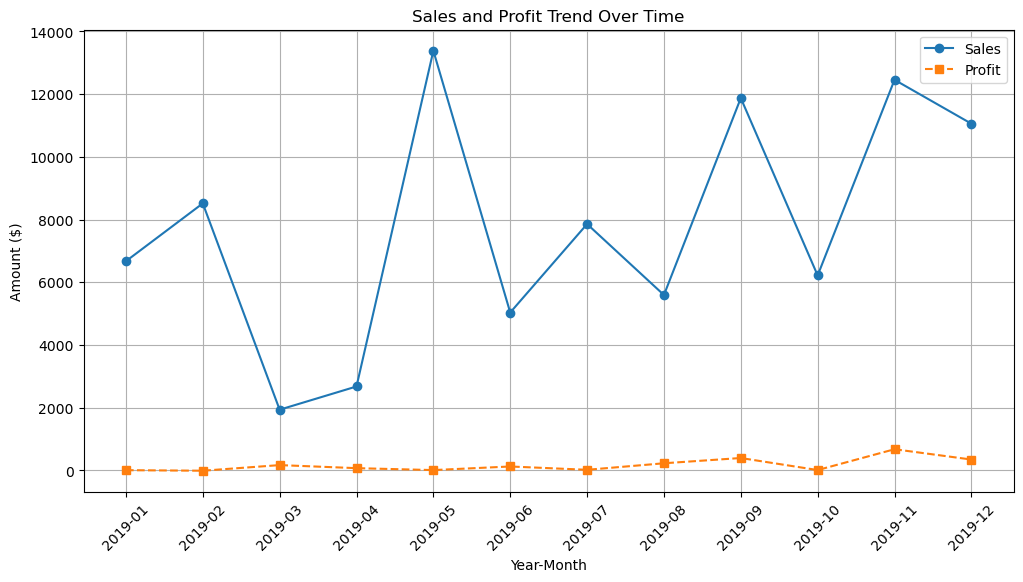

In [8]:
# Convert order_date to datetime format for time series analysis
merged_df["order_date"] = pd.to_datetime(merged_df["order_date"])

# Aggregate sales and profit by year-month
merged_df["year_month"] = merged_df["order_date"].dt.to_period("M")
sales_trend = merged_df.groupby("year_month")[["sales", "profit"]].sum()

# Plot Sales and Profit Trends
plt.figure(figsize=(12, 6))
plt.plot(sales_trend.index.astype(str), sales_trend["sales"], marker='o', label="Sales")
plt.plot(sales_trend.index.astype(str), sales_trend["profit"], marker='s', label="Profit", linestyle='dashed')
plt.xlabel("Year-Month")
plt.ylabel("Amount ($)")
plt.title("Sales and Profit Trend Over Time")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


#### Findings in Sales and Profit Trends:

The Sales and Profit Trend Over Time chart shows fluctuations in revenue and profitability over different months. 

Observe that the sales and profit appear to follow similar patterns, suggesting that higher sales generally lead to increased profit. There may be seasonal trends or specific periods of high sales that need further investigation.

The month of March has a significant drop in sales but the profit is slighty higher than in the month of May where the sales amount is way higher than the month of March.


### Top-Selling Products

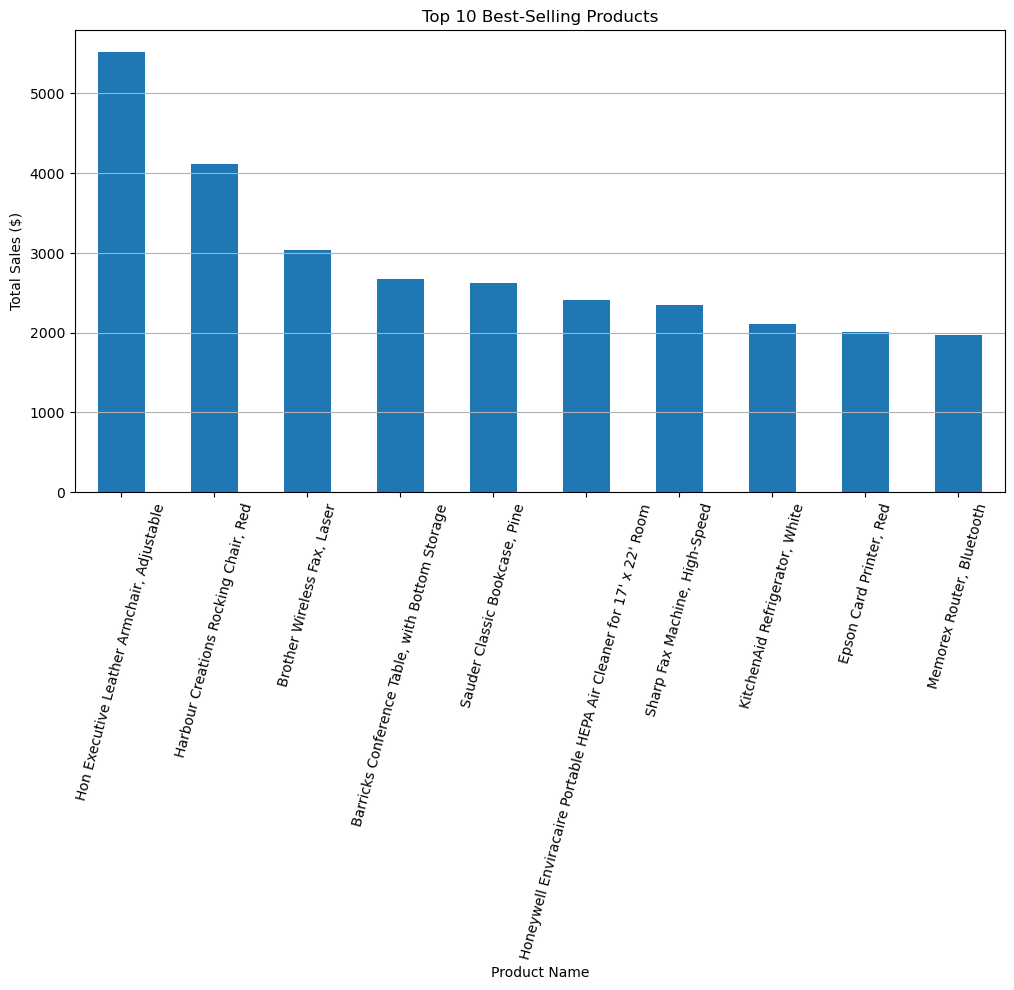

In [9]:
# Top 10 selling products by total sales
top_products = merged_df.groupby("product_name")["sales"].sum().sort_values(ascending=False).head(10
                                                                                                 )

# Plot Top 10 Selling Products
plt.figure(figsize=(12, 6))
top_products.plot(kind="bar")
plt.xlabel("Product Name")
plt.ylabel("Total Sales ($)")
plt.title("Top 10 Best-Selling Products")
plt.xticks(rotation=75)
plt.grid(axis="y")
plt.show()


#### Key Findings from The Top 10 Best-Selling Products chart: 
Certain products contribute significantly to total sales, mainly from items like chairs, tables, bookcase, printer, router and fax machines.

The company may consider optimizing inventory and marketing for these bestsellers to maximize revenue.

### Customer Segments Analysis

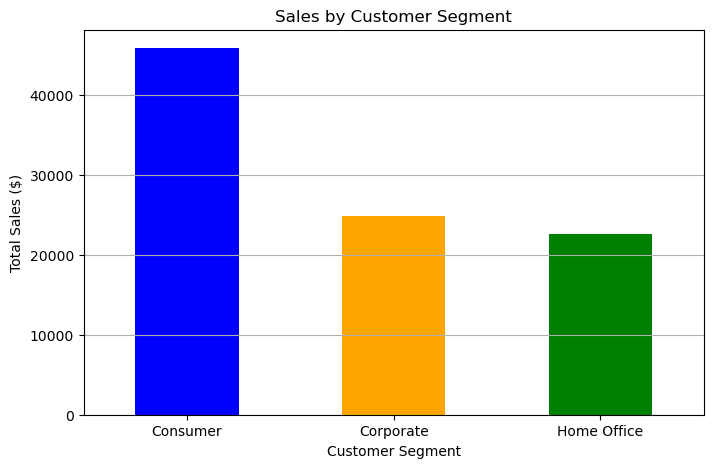

In [10]:
# Aggregate sales and profit by customer segment
segment_analysis = merged_df.groupby("segment")[["sales", "profit"]].sum().sort_values(by="sales", ascending=False)

# Plot Sales by Customer Segment
plt.figure(figsize=(8, 5))
segment_analysis["sales"].plot(kind="bar", color=['blue', 'orange', 'green'])
plt.xlabel("Customer Segment")
plt.ylabel("Total Sales ($)")
plt.title("Sales by Customer Segment")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()


#### The findings for Sales by Customer Segment chart indicates which customer groups contribute the most to sales:

Consumer segment likely dominates sales, while others contribute approximately 40% lesser.

The company can tailor marketing strategies to focus on high-value segments or improve engagement with lower-performing ones.

### Regional Performance

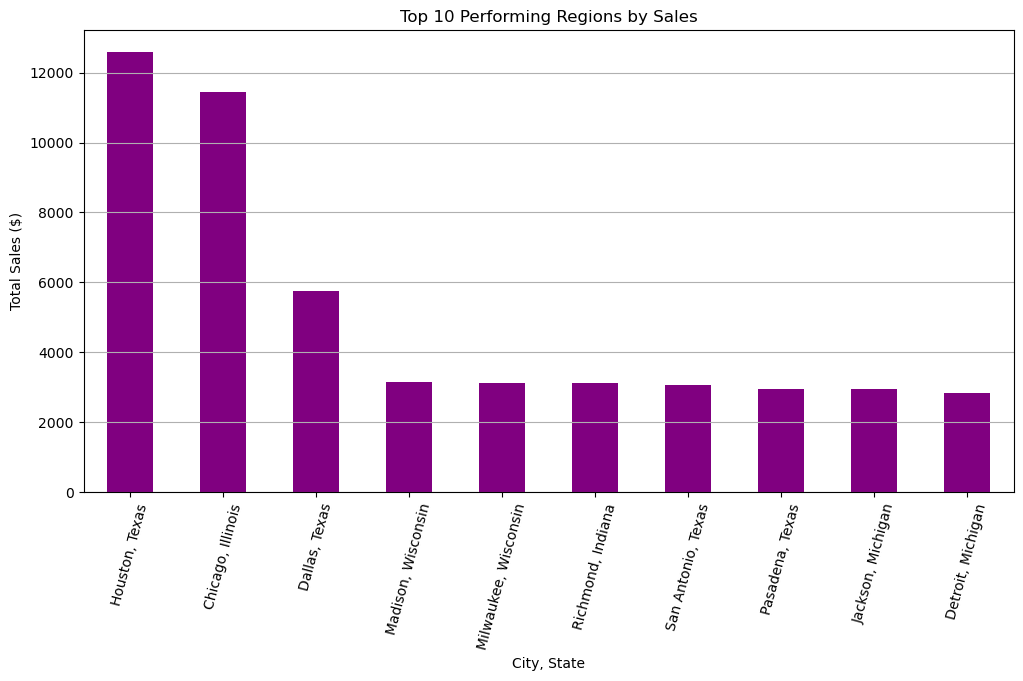

In [11]:
# Aggregate sales by city-state to identify top-performing regions
top_regions = merged_df.groupby("city_state")["sales"].sum().sort_values(ascending=False).head(10)

# Plot Top 10 Performing Regions by Sales
plt.figure(figsize=(12, 6))
top_regions.plot(kind="bar", color='purple')
plt.xlabel("City, State")
plt.ylabel("Total Sales ($)")
plt.title("Top 10 Performing Regions by Sales")
plt.xticks(rotation=75)
plt.grid(axis="y")
plt.show()


#### The Key Findings for the Top 10 Performing Regions by Sales chart highlights the geographical areas driving the most revenue: 

Certain cities or states contribute disproportionately to total sales.
The company may focus on expanding operations or strengthening marketing efforts in these high-performing regions.


### Overall Findings and EDA 

<b>1. Sales and Profit Trends:

- Sales and profit exhibit fluctuations, possibly due to seasonal factors or promotional events.

<b>2. Top-Selling Products:

- A few products generate a significant portion of revenue, suggesting opportunities for inventory optimization.

<b>3. Customer Segments:<b>

- One segment drives the majority of sales, which can inform targeted marketing and pricing strategies.

<b>4. Regional Performance:<b>

- Some cities/states dominate in revenue contribution, highlighting potential markets for further expansion.